In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

In [3]:
import matplotlib.font_manager as fm

[(f.name, f.fname) for f in fm.fontManager.ttflist]

[('STIXGeneral',
  '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf'),
 ('cmss10',
  '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf'),
 ('DejaVu Sans',
  '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'),
 ('STIXGeneral',
  '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf'),
 ('DejaVu Sans',
  '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf'),
 ('DejaVu Serif',
  '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf'),
 ('DejaVu Serif',
  '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf'),
 ('DejaVu Serif',
  '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf'),
 ('STIXNonUnicode',
  '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.tt

In [4]:
from numpy.core.numeric import full
import pandas as pd
import numpy as np
import glob
import missingno as msno
import time
#from parallel import parallel_processing

In [7]:
energy = pd.read_csv("/content/drive/My Drive/논문/dangjin_floating_energy.csv")
dangjin_obs = pd.read_csv("/content/drive/My Drive/논문/ASOS_dangjin_from_2018.csv", encoding='cp949')

dangjin_obs.drop(columns=dangjin_obs.columns[[0, 14, 16, 17, 18, 20, 21]], inplace = True)
# %%
full_time = pd.date_range(start='2018-01-01 00:00:00', end='2020-12-30 23:00:00', freq='H')
# energy[pd.to_datetime(energy['time']) == full_time] ## 27049개 모두 제대로 찍혀있음 확인.
# %%
energy['time'] = pd.to_datetime(energy['time'])
dangjin_obs['일시'] = pd.to_datetime(dangjin_obs['일시'])

In [8]:
# %%
data_obs = pd.merge(energy, dangjin_obs, how='outer', left_on='time', right_on='일시')
data_obs.drop(columns=['일시'], inplace=True)

c = list(data_obs.columns)
c = c + [c.pop(1)]

data_obs = data_obs[c]
# list(data_obs[data_obs['일시'].isna()]['time'])[:-744]

# %%
# 21년도 자료가 없어서 제거해주는거임 + 60개
data_obs.drop(index=data_obs.index[26280:], inplace=True)
# data_obs.drop(index=list(data_obs[data_obs['풍향(16방위)'].isna()].index), inplace=True)

# %%
value = {'강수량(mm)':0, '일조(hr)':0 , '일사(MJ/m2)':0, '적설(cm)':0, '시정(10m)':data_obs['시정(10m)'].mean(),
'풍향(16방위)':0}
data_obs.fillna(value, inplace=True)

processing time : 0.015211820602416992 s


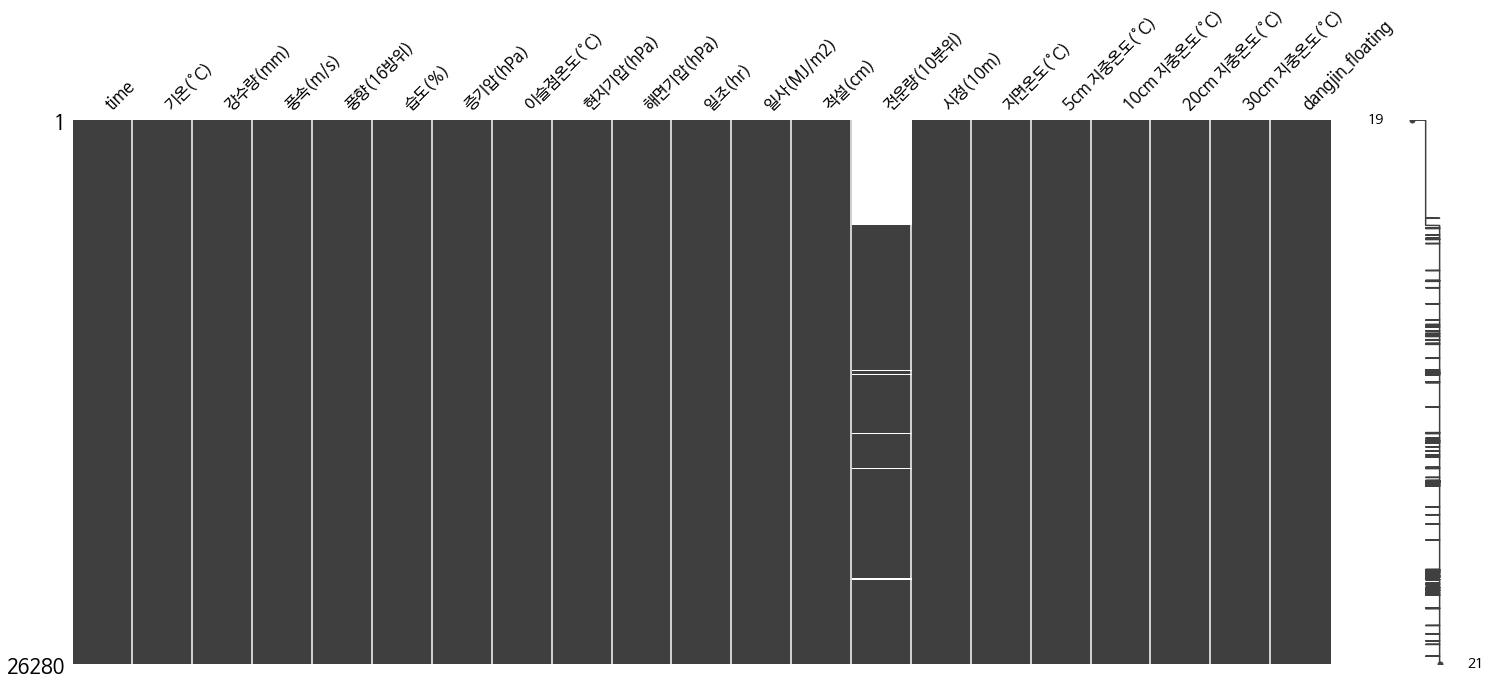

In [34]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
#msno.matrix(data_obs)
msno.matrix(data_obs)
# %%
'''
전운량ㅠ, 시정ㅠ , 2021년 자료ㅠ
'''

def dataframe_interpolation_by_spline(dataframe, columns):
    import time
    start = time.time()
    for column in columns:
        dataframe[column].interpolate(method='spline', order=3, inplace=True)
    print(f'processing time : {time.time()-start} s')

def dataframe_interpolation_by_linear(dataframe, columns):
    import time
    start = time.time()
    for column in columns:
        dataframe[column].interpolate(method='linear', inplace=True)
    print(f'processing time : {time.time()-start} s')


c_need_to_be_interpolated = ['기온(°C)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', 
                             '현지기압(hPa)','해면기압(hPa)', '지면온도(°C)', '5cm 지중온도(°C)', 
                             '10cm 지중온도(°C)','20cm 지중온도(°C)', '30cm 지중온도(°C)']

dataframe_interpolation_by_spline(data_obs, c_need_to_be_interpolated)

In [10]:
# %%
'''
발전량 null value 채우기.

for문 대신 numpy.array 의 broadcasting 을 이용함.

Broadcasting 이란  [1,2,3,4,5] + 4  , [1,2,3,4,5] * 4  등 원래 불가능한 연산을 아래와 같이 수행해주는 것을 말함.
=> [5,6,7,8,9]  ,  [4,8,12,16,20] 
실제로 list나 pandas.dataframe 은 이렇게 하면 연산 안 됨. numpy.array 만 지원.

그리고 tensorflow 나 torch 에서 사용하는 tensor 도 base 가 numpy.array 이기 때문에 tensor 에서도 broadcasting 을 지원.
은근 편할 때가 많이 있지만 잘못하면 의도한 것과 다르게 연산이 이루어지면서 오류 없이 돌아가는 상황이 발생할 수 있으니 사용할 때 약간 주의 필요.
'''


empty_list = data_obs[data_obs['dangjin_floating'].isna()].index.to_numpy()

In [11]:
empty_list

array([21769, 21770, 21771, 21772, 21773, 21774, 21775, 21776, 21777,
       21778, 21779, 21780, 21781, 21782, 21783, 21784, 21785, 21786,
       21787, 21788, 21789, 21790, 21791, 21792])

In [12]:
data_obs['dangjin_floating'][empty_list] = (data_obs['dangjin_floating'][(empty_list-24)].to_numpy() + data_obs['dangjin_floating'][(empty_list+24)].to_numpy()) / 2
data_obs['dangjin_floating'][empty_list]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


21769      0.0
21770      0.0
21771      0.0
21772      0.0
21773      0.0
21774      1.0
21775     13.5
21776     48.0
21777     74.5
21778    111.0
21779    156.5
21780    290.0
21781    314.5
21782    295.5
21783    290.0
21784    234.5
21785    194.0
21786    116.5
21787     42.0
21788      4.5
21789      0.0
21790      0.0
21791      0.0
21792      0.0
Name: dangjin_floating, dtype: float64

In [14]:
# %%
'''
풍향 8방위로 change

lambda x: (뭐시기 뭐시기 코드) 는 간단한 함수를 일일히 선언하지 않고 한 줄로 간단히 만들어 쓸 때 사용.
x가 인자. lambda x: ______   요기에 만들고 싶은 함수를 쓰면 됨. x**2, x[:-1] 등등.
apply 나 map 함수와 함께 편하게 사용할 수 있음. 
apply , map 함수는 list, numpy.array, dataframe 등 iterable 한 객체에 line by line 으로 갑을 변경하거나 어떤 함수를 적용할 때 사용.
for문 보다 훨씬 빠르고 코드도 간결. 경험상 경우에 따라 10배 이상 혹은 그것보다 많이 차이날 때도 있음.
'''


data_obs['풍향(16방위)'] = data_obs['풍향(16방위)'].apply(lambda x: 7.0 if x==360 else (x//45))
data_obs['풍향(16방위)']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26275    0.0
26276    0.0
26277    0.0
26278    0.0
26279    0.0
Name: 풍향(16방위), Length: 26280, dtype: float64

In [ ]:
# %%
# pd.get_dummies(data_obs)


# %%

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 26279
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              26280 non-null  datetime64[ns]
 1   기온(°C)            26280 non-null  float64       
 2   강수량(mm)           26280 non-null  float64       
 3   풍속(m/s)           26280 non-null  float64       
 4   풍향(16방위)          26280 non-null  float64       
 5   습도(%)             26280 non-null  float64       
 6   증기압(hPa)          26280 non-null  float64       
 7   이슬점온도(°C)         26280 non-null  float64       
 8   현지기압(hPa)         26280 non-null  float64       
 9   해면기압(hPa)         26280 non-null  float64       
 10  일조(hr)            26280 non-null  float64       
 11  일사(MJ/m2)         26280 non-null  float64       
 12  적설(cm)            26280 non-null  float64       
 13  전운량(10분위)         20889 non-null  float64       
 14  시정(10m)           2628

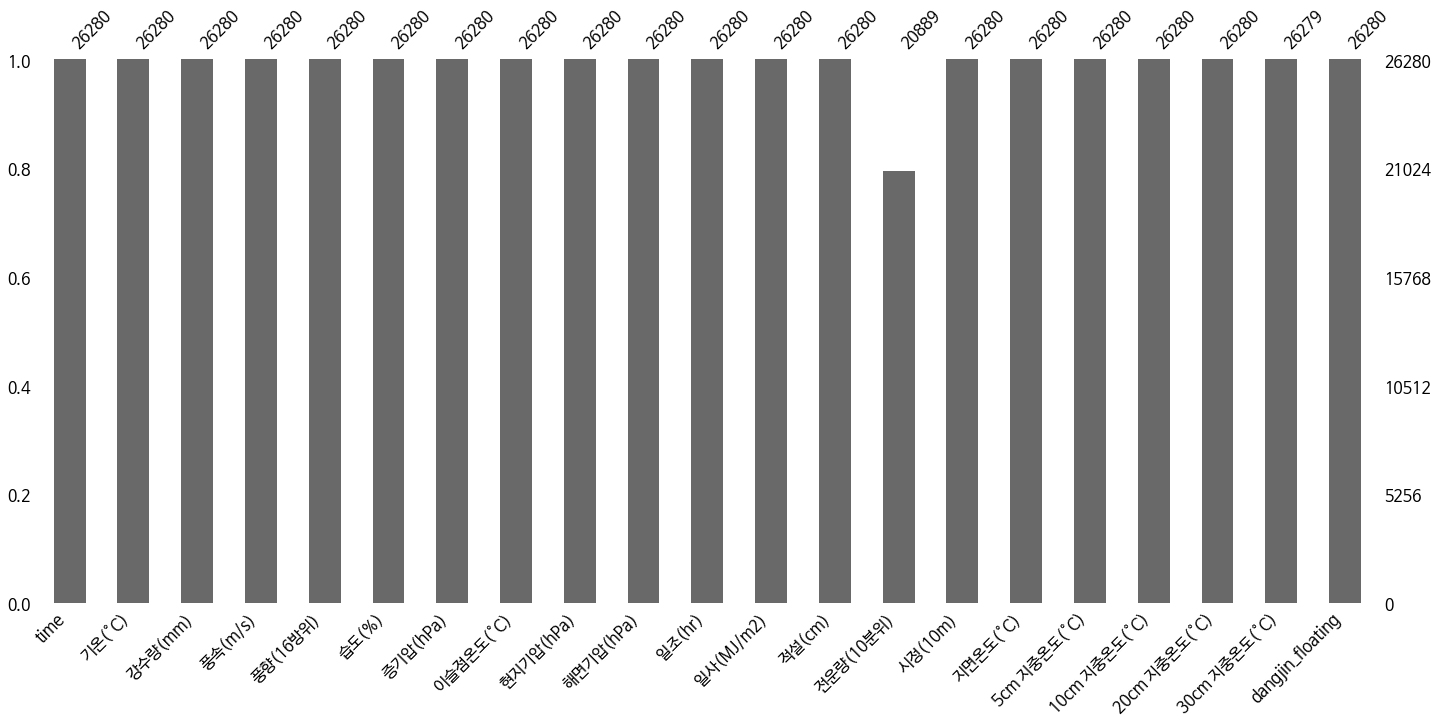

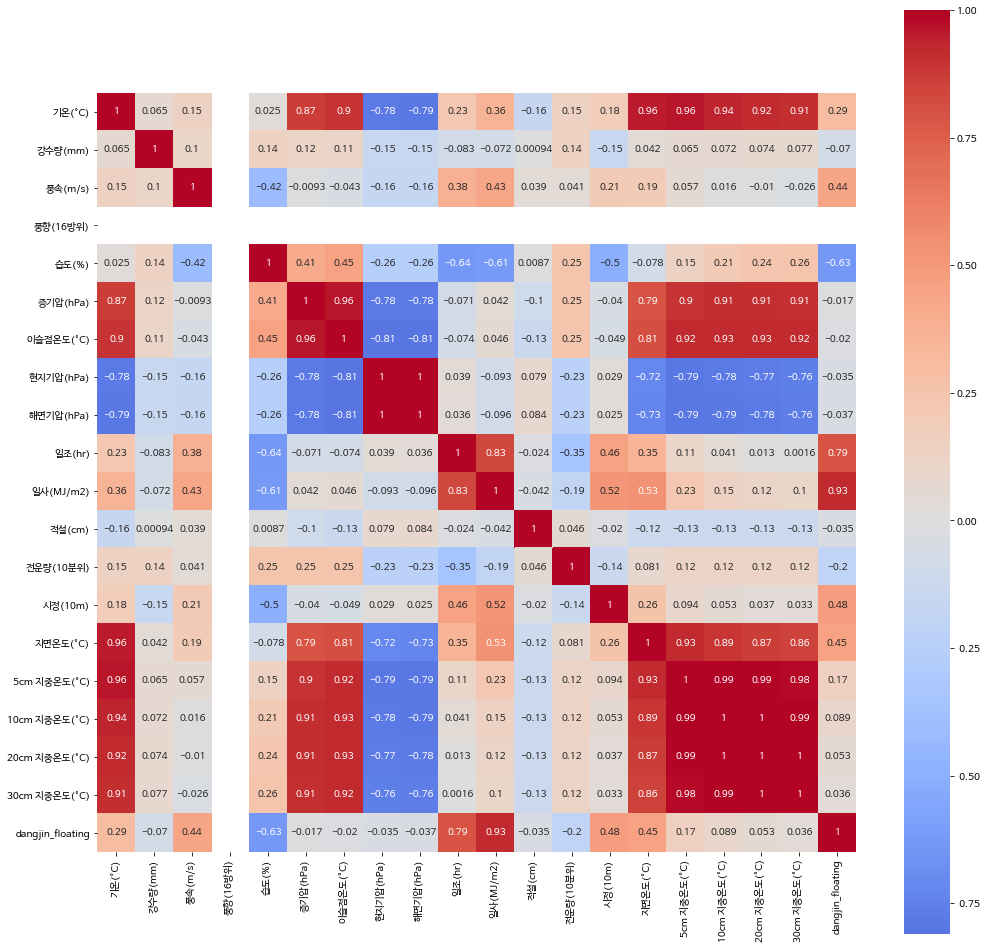

In [42]:
msno.bar(data_obs)

# %%

plt.figure(figsize=(17, 17))
correlations = data_obs.corr(method='pearson')
plt.rc('font', family='NanumBarunGothic')

sns.heatmap(correlations, cmap="coolwarm", square=True, center=0, annot=True)
plt.rc('font', family='NanumBarunGothic')
# %%
data_obs.info()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 26279
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              26280 non-null  datetime64[ns]
 1   기온(°C)            26280 non-null  float64       
 2   강수량(mm)           26280 non-null  float64       
 3   풍속(m/s)           26280 non-null  float64       
 4   풍향(16방위)          26280 non-null  float64       
 5   습도(%)             26280 non-null  float64       
 6   증기압(hPa)          26280 non-null  float64       
 7   이슬점온도(°C)         26280 non-null  float64       
 8   현지기압(hPa)         26280 non-null  float64       
 9   해면기압(hPa)         26280 non-null  float64       
 10  일조(hr)            26280 non-null  float64       
 11  일사(MJ/m2)         26280 non-null  float64       
 12  적설(cm)            26280 non-null  float64       
 13  전운량(10분위)         20889 non-null  float64       
 14  시정(10m)           2628

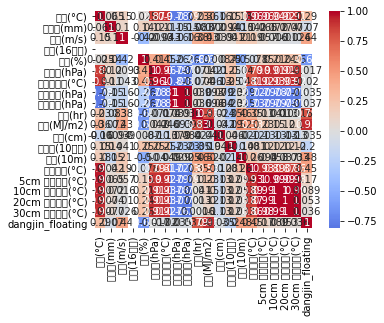

In [ ]:
# %%

In [17]:
'''
흐음 Normalize는 경우에 따라 좋은 선택이 아닐수도.. 이후에 검토가 필요하다.
'''
from sklearn.preprocessing import MinMaxScaler

def dataframe_normalize(dataframe):
    
    scaler = MinMaxScaler()

    dataframe[list(dataframe.columns)[1:-1]] = pd.DataFrame(scaler.fit_transform(dataframe.drop(columns=['time', 'dangjin_floating'])))
    

    return dataframe

data_obs = dataframe_normalize(data_obs)
# %%
data_obs.describe()
# %%

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),dangjin_floating
count,26280.000000,26280.000000,26280.000000,26280.0,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,20889.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26279.000000,26280.000000
mean,0.537439,0.002394,0.163611,0.0,0.620001,0.331078,0.592707,0.572561,0.573173,0.286579,0.126365,0.004098,0.524846,0.318030,0.348440,0.429392,0.446551,0.442701,0.450085,122.778995
std,0.197591,0.019203,0.132357,0.0,0.202824,0.243837,0.222925,0.162256,0.162570,0.422293,0.190353,0.044362,0.380637,0.182227,0.169548,0.228761,0.239987,0.256898,0.272718,192.967219
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374046,0.000000,0.059829,0.0,0.465691,0.121813,0.409274,0.447619,0.448211,0.000000,0.000000,0.000000,0.100000,0.207255,0.197101,0.219267,0.226221,0.205634,0.193252,0.000000
50%,0.547710,0.000000,0.136752,0.0,0.644041,0.260623,0.594758,0.573333,0.574388,0.000000,0.004124,0.000000,0.600000,0.297938,0.346377,0.425532,0.442159,0.439437,0.450920,0.000000
75%,0.704198,0.000000,0.247863,0.0,0.812482,0.512748,0.788306,0.699048,0.700565,0.800000,0.212371,0.000000,0.900000,0.379321,0.479710,0.635934,0.668380,0.681690,0.708589,193.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,753.000000


In [ ]:
# %%

[06:04:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend

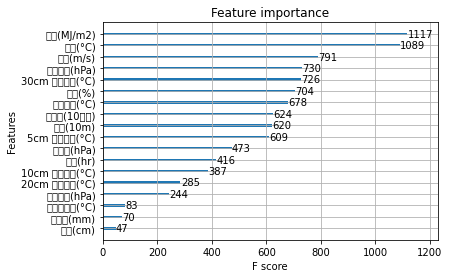

In [18]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score

Y=data_obs['dangjin_floating']
X =data_obs.drop(columns=['time', 'dangjin_floating'])

X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.1)

xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(X, Y)

plt.rc('font', family='Nanum Gothic')
xgboost.plot_importance(xgb_model)

In [ ]:
# %%

In [19]:
predictions = xgb_model.predict(X_test)

print('score :', xgb_model.score(X_train, y_train))
print('explained_score :',explained_variance_score(predictions,y_test))
print('r2_score :',r2_score(predictions,y_test))

score : 0.9628945620250707
explained_score : 0.9611141024734787
r2_score : 0.9610552721862876


In [ ]:
# %%

In [20]:
'''
예측갑과 실제갑 직접 비교해보기.
'''
start = 21768 + 336 
end = 21792 + 336

pred = pd.Series(xgb_model.predict(data_obs.iloc[start:end,1:-1]), name='prediction')
real = data_obs[['time', 'dangjin_floating']].iloc[start:end].reset_index(drop=True)

pd.concat([real, pred], axis = 1)

# %%
del xgb_model
del X, Y
del X_train, X_test, y_train, y_test
del pred, real
# %%

In [21]:
# %%

In [22]:
dangjin_fcst = pd.read_csv("/content/drive/My Drive/논문/dangjin_fcst_from_2018.csv")
dangjin_fcst
def time_modify(dataframe):

    '''
    year, month, day, hour 로 나뉘어 있는 값을 time 컬럼에 합치는 함수
    '''

    dataframe["year"] = dataframe["year"].astype(str)
    dataframe['month'] = dataframe['month'].astype(str)
    dataframe[' format: day'] = dataframe[' format: day'].astype(str)
    dataframe['hour'] = dataframe['hour'].astype(str).apply(lambda x: x[:-2]+":00")
    dataframe['forecast'] = dataframe['forecast'].astype(float)
    dataframe["time"] = dataframe["year"] + "-" + dataframe["month"] + "-" + dataframe[" format: day"] + " " + dataframe["hour"]
    dataframe.drop(columns=["year", "month", " format: day", "hour"], inplace=True)
    dataframe = dataframe[['time']+list(dataframe.columns[:-1])]
    dataframe['time'] = pd.to_datetime(dataframe['time'])
    
    return dataframe


dangjin_fcst = time_modify(dangjin_fcst)
dangjin_fcst

,time,forecast,3시간기온,습도,풍향,풍속,하늘상태,강수형태,6시간강수량,6시간적설,일최고기온,일최저기온,강수확률
0,2018-01-01 02:00:00,4.0,3.0,45.0,345.0,2.0,1.0,0.0,NaN,NaN,3.0,-3.0,0.0
1,2018-01-01 02:00:00,7.0,-1.0,70.0,327.0,3.5,1.0,0.0,0.0,0.0,2.0,-5.0,0.0
2,2018-01-01 02:00:00,10.0,-1.0,75.0,270.0,1.5,1.0,0.0,NaN,NaN,-1.0,NaN,0.0
3,2018-01-01 02:00:00,13.0,-1.0,85.0,270.0,1.5,1.0,0.0,0.0,0.0,NaN,NaN,0.0
4,2018-01-01 02:00:00,16.0,-1.0,85.0,313.0,3.5,1.0,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175526,2021-03-31 23:00:00,52.0,17.0,80.0,360.0,1.7,4.0,1.0,10.0,0.0,NaN,NaN,60.0
175527,2021-03-31 23:00:00,55.0,17.0,90.0,356.0,1.3,4.0,1.0,NaN,NaN,NaN,NaN,63.0
175528,2021-03-31 23:00:00,58.0,16.0,90.0,31.0,1.7,4.0,1.0,20.0,0.0,NaN,NaN,60.0
175529,2021-03-31 23:00:00,61.0,15.0,90.0,25.0,3.1,4.0,1.0,NaN,NaN,NaN,NaN,60.0


In [ ]:
# %%

In [23]:
import os
from multiprocessing import Pool

def forecast_change(dataframe):

    print('PID :', os.getpid())

    df = dataframe[["time", "forecast"]]

    for i in dataframe.index.tolist():

        dataframe["forecast"][i] = df["time"][i] + pd.DateOffset(hours=df["forecast"][i])

    return dataframe

# %%
def parallel_processing(dataframe, function, num_cores):

    '''
    forecast 컬럼을 예보데이터가 나타내는 시간으로 변경하는 함수가 forecast_change.
    멀티 프로세싱으로 처리하기 위한 함수.
    '''
    
    import time

    start = time.time()

    df_split = np.array_split(dataframe, num_cores)
    pool = Pool(num_cores)
    dataframe = pd.concat(pool.map(function, df_split))
    pool.close()
    pool.join()

    print('\n\n\n',f'processing time : {time.time()-start} s')
    
    return dataframe 


# %%

import numpy as np
dangjin_fcst = parallel_processing(dangjin_fcst, forecast_change, 12)
dangjin_fcst

PID : 3954


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


PID : 3955
PID : 3956


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


PID : 3957
PID : 3958
PID : 3960
PID : 3959


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


PID : 3961


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


PID : 3962


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


PID : 3963
PID : 3965
PID : 3964


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/i




 processing time : 39.50604510307312 s


,time,forecast,3시간기온,습도,풍향,풍속,하늘상태,강수형태,6시간강수량,6시간적설,일최고기온,일최저기온,강수확률
0,2018-01-01 02:00:00,2018-01-01 06:00:00,3.0,45.0,345.0,2.0,1.0,0.0,NaN,NaN,3.0,-3.0,0.0
1,2018-01-01 02:00:00,2018-01-01 09:00:00,-1.0,70.0,327.0,3.5,1.0,0.0,0.0,0.0,2.0,-5.0,0.0
2,2018-01-01 02:00:00,2018-01-01 12:00:00,-1.0,75.0,270.0,1.5,1.0,0.0,NaN,NaN,-1.0,NaN,0.0
3,2018-01-01 02:00:00,2018-01-01 15:00:00,-1.0,85.0,270.0,1.5,1.0,0.0,0.0,0.0,NaN,NaN,0.0
4,2018-01-01 02:00:00,2018-01-01 18:00:00,-1.0,85.0,313.0,3.5,1.0,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175526,2021-03-31 23:00:00,2021-04-03 03:00:00,17.0,80.0,360.0,1.7,4.0,1.0,10.0,0.0,NaN,NaN,60.0
175527,2021-03-31 23:00:00,2021-04-03 06:00:00,17.0,90.0,356.0,1.3,4.0,1.0,NaN,NaN,NaN,NaN,63.0
175528,2021-03-31 23:00:00,2021-04-03 09:00:00,16.0,90.0,31.0,1.7,4.0,1.0,20.0,0.0,NaN,NaN,60.0
175529,2021-03-31 23:00:00,2021-04-03 12:00:00,15.0,90.0,25.0,3.1,4.0,1.0,NaN,NaN,NaN,NaN,60.0


In [ ]:
# %%

In [24]:
dangjin_fcst.sort_values(by=["forecast", "time"], inplace=True)
dangjin_fcst.drop_duplicates(subset="forecast", keep="last", inplace=True)
dangjin_fcst.drop(columns="time", inplace=True)
dangjin_fcst.reset_index(drop=True, inplace=True)
dangjin_fcst

,forecast,3시간기온,습도,풍향,풍속,하늘상태,강수형태,6시간강수량,6시간적설,일최고기온,일최저기온,강수확률
0,2018-01-01 06:00:00,3.0,45.0,345.0,2.0,1.0,0.0,NaN,NaN,3.0,-3.0,0.0
1,2018-01-01 09:00:00,-1.0,70.0,327.0,3.5,1.0,0.0,0.0,0.0,2.0,-3.0,0.0
2,2018-01-01 12:00:00,-1.0,75.0,270.0,2.7,1.0,0.0,NaN,NaN,1.0,-3.0,0.0
3,2018-01-01 15:00:00,-1.0,80.0,270.0,4.0,1.0,0.0,0.0,0.0,1.0,-3.0,0.0
4,2018-01-01 18:00:00,-1.0,90.0,313.0,4.2,1.0,0.0,NaN,NaN,1.0,-3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9503,2021-04-03 03:00:00,17.0,80.0,360.0,1.7,4.0,1.0,10.0,0.0,NaN,NaN,60.0
9504,2021-04-03 06:00:00,17.0,90.0,356.0,1.3,4.0,1.0,NaN,NaN,NaN,NaN,63.0
9505,2021-04-03 09:00:00,16.0,90.0,31.0,1.7,4.0,1.0,20.0,0.0,NaN,NaN,60.0
9506,2021-04-03 12:00:00,15.0,90.0,25.0,3.1,4.0,1.0,NaN,NaN,NaN,NaN,60.0


In [ ]:
# %%

In [25]:
dangjin_fcst = dangjin_fcst[:8759]
dangjin_fcst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   forecast  8759 non-null   object 
 1   3시간기온     8759 non-null   float64
 2   습도        8759 non-null   float64
 3   풍향        8759 non-null   float64
 4   풍속        8759 non-null   float64
 5   하늘상태      8759 non-null   float64
 6   강수형태      8759 non-null   float64
 7   6시간강수량    4379 non-null   float64
 8   6시간적설     4379 non-null   float64
 9   일최고기온     8759 non-null   float64
 10  일최저기온     8759 non-null   float64
 11  강수확률      8759 non-null   float64
dtypes: float64(11), object(1)
memory usage: 821.3+ KB


In [ ]:
# %%

In [26]:
dangjin_fcst["6시간강수량"].interpolate(method="linear", inplace=True)
dangjin_fcst["6시간적설"].interpolate(method="linear", inplace=True)
dangjin_fcst["6시간강수량"].iloc[0] = 0.0
dangjin_fcst["6시간적설"].iloc[0] = 0.0
# %%
dangjin_fcst["forecast"] = pd.to_datetime(dangjin_fcst["forecast"])
full_time = pd.Series(full_time, name="time")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/li

In [27]:
data_fcst = pd.merge(full_time, dangjin_fcst, how='outer', left_on="time", right_on="forecast").drop(columns="forecast")
# %%

In [28]:
columns_spline_interpolated = ["3시간기온", "습도", "풍향", "풍속", "일최고기온", "일최저기온"]
columns_linear_interpolated = ["하늘상태", "강수형태", "6시간강수량", "6시간적설", "강수확률"]

dataframe_interpolation_by_spline(data_fcst, columns_spline_interpolated)
dataframe_interpolation_by_linear(data_fcst, columns_linear_interpolated)

processing time : 22.6385338306427 s
processing time : 0.022348403930664062 s


In [29]:
# %%
'''
일단 평균으로 다 채워놓음. 이전 일시 데이터 받아서 채워야함.
시정채우기, 전운량 채우기, 
'''
data_fcst = data_fcst[:-1]
data_fcst.fillna(data_fcst.mean(), inplace=True)
data_fcst.info()

# %%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 26279
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    26280 non-null  datetime64[ns]
 1   3시간기온   26280 non-null  float64       
 2   습도      26280 non-null  float64       
 3   풍향      26280 non-null  float64       
 4   풍속      26280 non-null  float64       
 5   하늘상태    26280 non-null  float64       
 6   강수형태    26280 non-null  float64       
 7   6시간강수량  26280 non-null  float64       
 8   6시간적설   26280 non-null  float64       
 9   일최고기온   26280 non-null  float64       
 10  일최저기온   26280 non-null  float64       
 11  강수확률    26280 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 2.6 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  import sys


In [30]:
# %%
import torch
import torch.nn as nn

obs_inputs = data_obs.drop(columns=['time', 'dangjin_floating'])
outputs = data_obs['dangjin_floating']

fcst_inputs = data_fcst.drop(columns=["time"])


obs_inputs.info()
# %%
obs_inputs.fillna(0, inplace=True) # 전운량 일단 0으로 채우기

obs_inputs = torch.tensor(obs_inputs.to_numpy(), dtype=torch.float32).contiguous().view(-1, 24, 19)
outputs = torch.tensor(outputs.to_numpy(), dtype=torch.float32).contiguous().view(-1, 24)

fcst_inputs = torch.tensor(fcst_inputs.to_numpy(), dtype=torch.float32).contiguous().view(-1, 24, 11)

obs_inputs.shape, outputs.shape, fcst_inputs.shape
# %%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 26279
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   기온(°C)         26280 non-null  float64
 1   강수량(mm)        26280 non-null  float64
 2   풍속(m/s)        26280 non-null  float64
 3   풍향(16방위)       26280 non-null  float64
 4   습도(%)          26280 non-null  float64
 5   증기압(hPa)       26280 non-null  float64
 6   이슬점온도(°C)      26280 non-null  float64
 7   현지기압(hPa)      26280 non-null  float64
 8   해면기압(hPa)      26280 non-null  float64
 9   일조(hr)         26280 non-null  float64
 10  일사(MJ/m2)      26280 non-null  float64
 11  적설(cm)         26280 non-null  float64
 12  전운량(10분위)      20889 non-null  float64
 13  시정(10m)        26280 non-null  float64
 14  지면온도(°C)       26280 non-null  float64
 15  5cm 지중온도(°C)   26280 non-null  float64
 16  10cm 지중온도(°C)  26280 non-null  float64
 17  20cm 지중온도(°C)  26280 non-null  float64
 18  30cm 지

(torch.Size([1095, 24, 19]),
 torch.Size([1095, 24]),
 torch.Size([1095, 24, 11]))

In [31]:
class Model(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.obs_input_size = config["obs_input_size"]
        self.fcst_input_size = config["fcst_input_size"]
        self.obs_hidden_size = config["obs_hidden_size"]
        self.fcst_hidden_size = config["fcst_hidden_size"]
        self.dropout_ratio = config["dropout_ratio"]

        self.lstm_cell1 = nn.LSTM(self.obs_input_size, self.obs_hidden_size, batch_first=True)
        self.lstm_cell2 = nn.LSTM(self.fcst_input_size, self.fcst_hidden_size, batch_first=True)


        self.dropout = nn.Dropout(self.dropout_ratio)
        
        self.linear1 = nn.Linear(self.obs_hidden_size + self.fcst_hidden_size, 50)
        self.linear2 = nn.Linear(50, 1)



        self.loss_func = nn.MSELoss()
        self.eps = 1e-6
        # https://discuss.pytorch.org/t/rmse-loss-function/16540/4

    def forward(self, obs_inputs, fcst_inputs, outputs=None):
        
        out_1, _ = self.lstm_cell1(obs_inputs)
        out_2, _ = self.lstm_cell2(fcst_inputs)

        out_ = torch.cat((out_1, out_2), dim=-1)

        out_ = self.dropout(out_)
        out_ = self.linear1(out_)
        
        pred = self.linear2(out_)
        pred = pred.squeeze(-1)
        
        if outputs is not None:
            loss = torch.sqrt(self.loss_func(pred, outputs) + self.eps)

            return loss

        else:
            return pred

In [32]:
# %%
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

config = {'obs_input_size': 19,
          'fcst_input_size': 11,
          'obs_hidden_size': 50,
          'fcst_hidden_size': 50,
          'dropout_ratio':0.3}


# %%
from torch.utils.data import TensorDataset, DataLoader, random_split

dataset = TensorDataset(obs_inputs,fcst_inputs, outputs)
train_dataset, valid_dataset = random_split(dataset, [1065, 30])
train_dataloader = DataLoader(train_dataset, batch_size=128)
# %%
model = Model(config).to(device)

In [33]:
# %%
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epochs = 200


for i in range(epochs):

    losses = []

    model.train()
    for step, batch in enumerate(train_dataloader):

        batch = tuple(t.to(device) for t in batch)

        obs_inputs, fcst_inputs, outputs = batch[0], batch[1], batch[2]

        optimizer.zero_grad()

        loss = model(obs_inputs, fcst_inputs, outputs)

        loss.backward()

        optimizer.step()

        losses.append(loss.item())

    if i%10 == 0 : print(f"{i}-epochs Average loss : {np.mean(losses)}")

# %%

n = 9

model.eval()
a = pd.Series(model(valid_dataset[n][0].unsqueeze(0).to(device), valid_dataset[n][1].unsqueeze(0).to(device)).detach().cpu().numpy().squeeze())
b = pd.Series(valid_dataset[n][2].detach().numpy())
pd.concat([a, b], axis=1)
# %%

0-epochs Average loss : 227.01960923936633
10-epochs Average loss : 226.31330362955728
20-epochs Average loss : 223.1039276123047
30-epochs Average loss : 218.29339599609375
40-epochs Average loss : 211.85435485839844
50-epochs Average loss : 205.3822021484375
60-epochs Average loss : 198.6319546169705
70-epochs Average loss : 192.6476559109158
80-epochs Average loss : 187.5546129014757
90-epochs Average loss : 182.7837846544054
100-epochs Average loss : 178.5267300075955
110-epochs Average loss : 174.9697994656033
120-epochs Average loss : 171.75545077853732
130-epochs Average loss : 169.10479227701822
140-epochs Average loss : 166.87801784939236
150-epochs Average loss : 165.06278143988715
160-epochs Average loss : 163.27293735080295
170-epochs Average loss : 161.52787441677518
180-epochs Average loss : 159.71839396158853
190-epochs Average loss : 157.32831827799478


,0,1
0,0.510857,0.0
1,5.788371,0.0
2,12.572548,0.0
3,20.577118,0.0
4,29.868443,0.0
5,40.930408,0.0
6,54.322094,0.0
7,73.357964,0.0
8,107.378891,19.0
9,176.196396,178.0


# 데이터 분포 및 구조 확인

In [99]:
def EDA(df,columns):
  print(df[columns].describe())
  df[columns].plot()

## dangjin_fcst

In [68]:
dangjin_fcst

,forecast,3시간기온,습도,풍향,풍속,하늘상태,강수형태,6시간강수량,6시간적설,일최고기온,일최저기온,강수확률
0,2018-01-01 06:00:00,3.0,45.0,345.0,2.0,1.0,0.0,0.0,0.0,3.0,-3.0,0.0
1,2018-01-01 09:00:00,-1.0,70.0,327.0,3.5,1.0,0.0,0.0,0.0,2.0,-3.0,0.0
2,2018-01-01 12:00:00,-1.0,75.0,270.0,2.7,1.0,0.0,0.0,0.0,1.0,-3.0,0.0
3,2018-01-01 15:00:00,-1.0,80.0,270.0,4.0,1.0,0.0,0.0,0.0,1.0,-3.0,0.0
4,2018-01-01 18:00:00,-1.0,90.0,313.0,4.2,1.0,0.0,0.0,0.0,1.0,-3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2020-12-30 12:00:00,-8.0,55.0,331.0,15.0,4.0,0.0,0.0,0.0,-3.0,-8.0,30.0
8755,2020-12-30 15:00:00,-8.0,55.0,332.0,15.0,4.0,0.0,0.0,0.0,-3.0,-8.0,30.0
8756,2020-12-30 18:00:00,-8.0,60.0,334.0,15.0,4.0,0.0,0.0,0.0,-3.0,-8.0,30.0
8757,2020-12-30 21:00:00,-7.0,65.0,349.0,15.0,4.0,0.0,0.0,0.0,-3.0,-8.0,30.0


count    8759.000000
mean       12.430711
std         9.982812
min       -14.000000
25%         4.000000
50%        13.000000
75%        21.000000
max        35.000000
Name: 3시간기온, dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


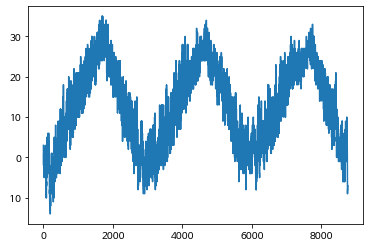

In [74]:
EDA(dangjin_fcst,'3시간기온')

count    8759.000000
mean       77.538874
std        17.281301
min        10.000000
25%        65.000000
50%        80.000000
75%        95.000000
max       100.000000
Name: 습도, dtype: float64


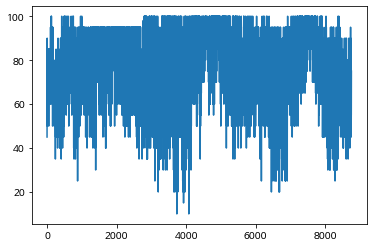

In [75]:
EDA(dangjin_fcst,'습도')

count    8759.000000
mean      214.787533
std       107.095971
min         1.000000
25%       118.000000
50%       236.000000
75%       313.000000
max       360.000000
Name: 풍향, dtype: float64


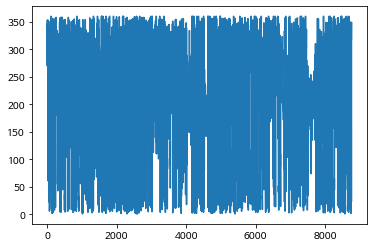

In [76]:
EDA(dangjin_fcst,'풍향')

count    8759.000000
mean        3.659573
std         2.627721
min         0.100000
25%         1.800000
50%         2.800000
75%         4.600000
max        28.700001
Name: 풍속, dtype: float64


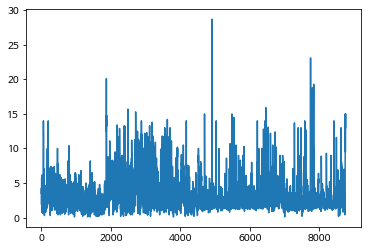

In [77]:
EDA(dangjin_fcst,'풍속')

In [84]:
dangjin_fcst['하늘상태'].value_counts()

1.0    2836
3.0    2515
4.0    2299
2.0    1109
Name: 하늘상태, dtype: int64

In [85]:
dangjin_fcst['강수형태'].value_counts()

0.0    7706
1.0     929
3.0      90
2.0      20
4.0      14
Name: 강수형태, dtype: int64

count    8759.000000
mean        1.938121
std         8.062827
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: 6시간강수량, dtype: float64


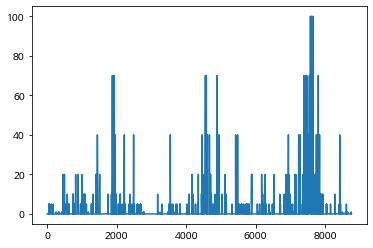

In [86]:
EDA(dangjin_fcst,'6시간강수량')

In [92]:
dangjin_fcst['6시간강수량'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
0.5      0.0
0.6      0.0
0.7      0.0
0.8      0.0
0.9      5.0
1.0    100.0
Name: 6시간강수량, dtype: float64

count    8759.000000
mean        0.030369
std         0.333985
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: 6시간적설, dtype: float64


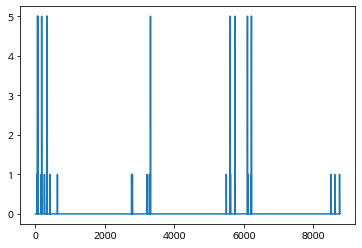

In [94]:
EDA(dangjin_fcst,'6시간적설')

In [95]:
dangjin_fcst['6시간적설'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.1    0.0
0.2    0.0
0.3    0.0
0.4    0.0
0.5    0.0
0.6    0.0
0.7    0.0
0.8    0.0
0.9    0.0
1.0    5.0
Name: 6시간적설, dtype: float64

count    8759.000000
mean       17.111051
std        10.059530
min       -10.000000
25%         9.000000
50%        18.000000
75%        26.000000
max        35.000000
Name: 일최고기온, dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


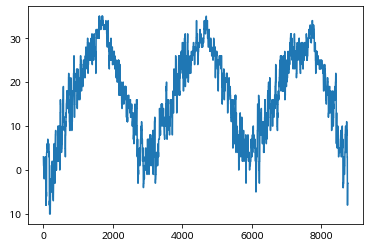

In [96]:
EDA(dangjin_fcst,'일최고기온')

count    8759.000000
mean        8.914945
std         9.644134
min       -14.000000
25%         1.000000
50%         8.000000
75%        17.000000
max        26.000000
Name: 일최저기온, dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


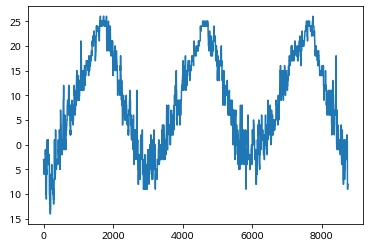

In [97]:
EDA(dangjin_fcst,'일최저기온')

count    8759.000000
mean       19.393081
std        20.924924
min         0.000000
25%         0.000000
50%        20.000000
75%        30.000000
max        90.000000
Name: 강수확률, dtype: float64


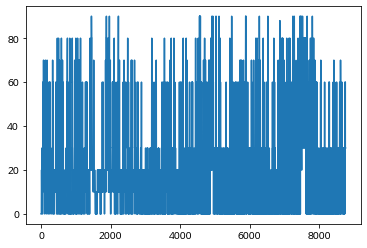

In [98]:
EDA(dangjin_fcst,'강수확률')

count    8759.000000
mean       77.538874
std        17.281301
min        10.000000
25%        65.000000
50%        80.000000
75%        95.000000
max       100.000000
Name: 습도, dtype: float64

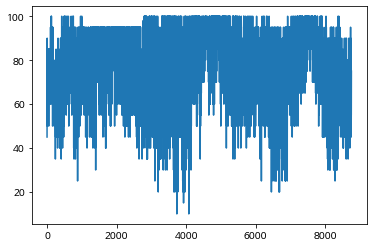

In [66]:
dangjin_fcst['습도'].plot()
dangjin_fcst['습도'].describe()

## dangjin_obs

In [101]:
dangjin_obs

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2018-01-01 00:00:00,-2.1,NaN,1.1,70.0,70.0,3.7,-6.8,1023.6,1027.3,NaN,NaN,NaN,NaN,NaN,-1.4,1.1,1.9,2.3,NaN
1,2018-01-01 01:00:00,-3.5,NaN,1.0,90.0,79.0,3.7,-6.6,1023.5,1027.2,NaN,NaN,NaN,NaN,NaN,-1.6,1.0,1.8,2.2,3.0
2,2018-01-01 02:00:00,-4.3,NaN,0.4,0.0,86.0,3.8,-6.3,1023.5,1027.3,NaN,NaN,NaN,NaN,NaN,-1.8,0.8,1.7,2.2,3.0
3,2018-01-01 03:00:00,-5.1,NaN,0.2,0.0,89.0,3.7,-6.6,1023.8,1027.6,NaN,NaN,NaN,NaN,NaN,-2.1,0.7,1.6,2.1,3.0
4,2018-01-01 04:00:00,-5.6,NaN,0.6,20.0,90.0,3.6,-7.0,1023.8,1027.6,NaN,NaN,NaN,NaN,NaN,-2.2,0.6,1.6,2.0,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,2020-12-31 19:00:00,-6.4,NaN,0.8,70.0,85.0,3.2,-8.5,1023.1,1026.4,NaN,NaN,2.2,8.0,668.0,-0.3,0.6,1.3,1.8,2.8
26277,2020-12-31 20:00:00,-6.7,NaN,1.1,230.0,88.0,3.3,-8.3,1023.9,1027.2,NaN,NaN,2.1,9.0,1395.0,-0.5,0.6,1.3,1.8,2.7
26278,2020-12-31 21:00:00,-6.9,0.0,0.5,230.0,88.0,3.2,-8.5,1023.8,1027.1,NaN,NaN,1.9,9.0,1036.0,-0.7,0.7,1.3,1.8,2.7
26279,2020-12-31 22:00:00,-6.9,NaN,0.5,180.0,89.0,3.2,-8.4,1023.9,1027.2,NaN,NaN,1.8,10.0,890.0,-0.8,0.7,1.3,1.8,2.7


count    2488.000000
mean        1.459405
std         3.323123
min         0.000000
25%         0.000000
50%         0.200000
75%         1.400000
max        57.700000
Name: 강수량(mm), dtype: float64


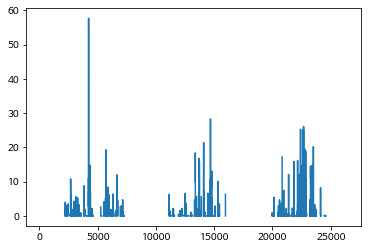

In [105]:
EDA(dangjin_obs,'강수량(mm)')

count    26244.000000
mean         1.913234
std          1.549351
min          0.000000
25%          0.700000
50%          1.600000
75%          2.900000
max         11.700000
Name: 풍속(m/s), dtype: float64


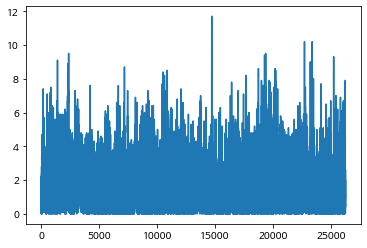

In [106]:
EDA(dangjin_obs,'풍속(m/s)')

count    26244.000000
mean       163.609587
std        134.456212
min          0.000000
25%         20.000000
50%        180.000000
75%        290.000000
max        360.000000
Name: 풍향(16방위), dtype: float64


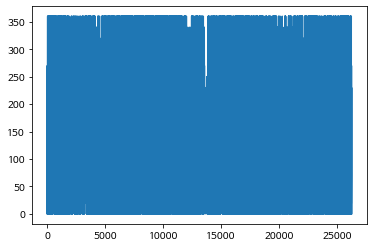

In [107]:
EDA(dangjin_obs,'풍향(16방위)')

count    26236.000000
mean        12.669046
std          8.597680
min          1.000000
25%          5.300000
50%         10.200000
75%         19.100000
max         36.300000
Name: 증기압(hPa), dtype: float64


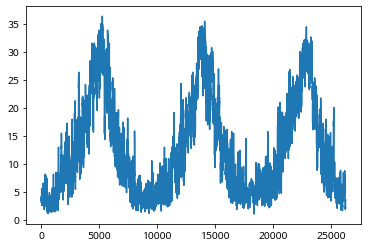

In [109]:
EDA(dangjin_obs,'증기압(hPa)')

count    26234.000000
mean         7.077194
std         11.054222
min        -22.300000
25%         -2.000000
50%          7.200000
75%         16.800000
max         27.300000
Name: 이슬점온도(°C), dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


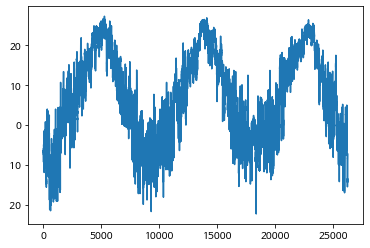

In [111]:
EDA(dangjin_obs,'이슬점온도(°C)')

count    14305.000000
mean         0.526844
std          0.448616
min          0.000000
25%          0.000000
50%          0.600000
75%          1.000000
max          1.000000
Name: 일조(hr), dtype: float64


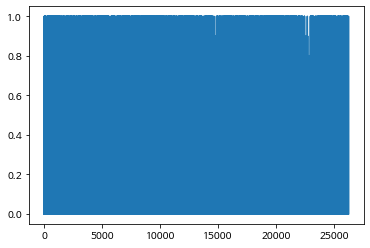

In [113]:
EDA(dangjin_obs,'일조(hr)')

count    14305.000000
mean         1.126538
std          0.993799
min          0.000000
25%          0.230000
50%          0.890000
75%          1.840000
max          4.850000
Name: 일사(MJ/m2), dtype: float64


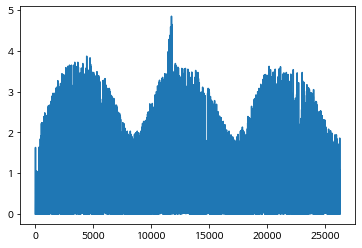

In [114]:
EDA(dangjin_obs,'일사(MJ/m2)')

count    355.000000
mean       3.750423
std        2.814655
min        0.000000
25%        1.300000
50%        3.300000
75%        5.700000
max       12.200000
Name: 적설(cm), dtype: float64


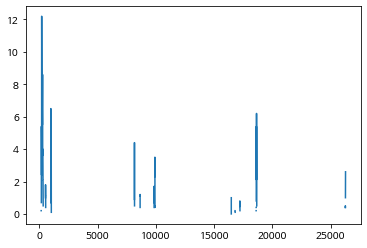

In [115]:
EDA(dangjin_obs,'적설(cm)')

In [117]:
dangjin_obs['전운량(10분위)'].value_counts()

0.0     4804
10.0    3692
9.0     2274
8.0     1931
7.0     1873
6.0     1590
5.0     1070
1.0     1025
2.0      926
4.0      888
3.0      840
Name: 전운량(10분위), dtype: int64

count    25663.000000
mean      2053.845614
std       1190.100517
min          3.000000
25%       1312.000000
50%       1907.000000
75%       2478.000000
max       6454.000000
Name: 시정(10m), dtype: float64


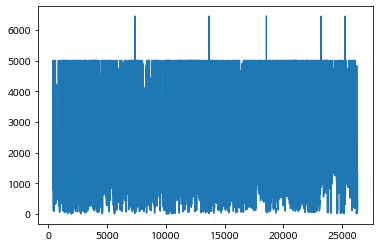

In [119]:
EDA(dangjin_obs,'시정(10m)')

count    26241.000000
mean        14.723425
std         11.695661
min         -9.300000
25%          4.300000
50%         14.600000
75%         23.800000
max         59.700000
Name: 지면온도(°C), dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


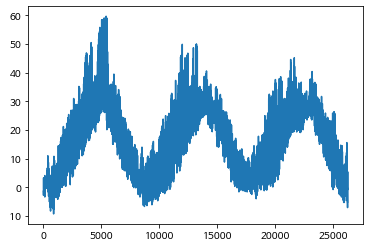

In [120]:
EDA(dangjin_obs,'지면온도(°C)')

count    26239.000000
mean        14.449285
std          9.673065
min         -3.700000
25%          5.500000
50%         14.300000
75%         23.200000
max         38.600000
Name: 5cm 지중온도(°C), dtype: float64


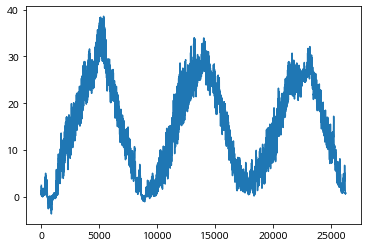

In [121]:
EDA(dangjin_obs,'5cm 지중온도(°C)')

## data_fcst

In [122]:
data_fcst

,time,3시간기온,습도,풍향,풍속,하늘상태,강수형태,6시간강수량,6시간적설,일최고기온,일최저기온,강수확률
0,2018-01-01 00:00:00,12.432575,77.540541,214.802965,3.658935,2.488239,0.147865,1.938342,0.030372,17.113170,8.916636,19.393012
1,2018-01-01 01:00:00,12.432575,77.540541,214.802965,3.658935,2.488239,0.147865,1.938342,0.030372,17.113170,8.916636,19.393012
2,2018-01-01 02:00:00,12.432575,77.540541,214.802965,3.658935,2.488239,0.147865,1.938342,0.030372,17.113170,8.916636,19.393012
3,2018-01-01 03:00:00,12.432575,77.540541,214.802965,3.658935,2.488239,0.147865,1.938342,0.030372,17.113170,8.916636,19.393012
4,2018-01-01 04:00:00,12.432575,77.540541,214.802965,3.658935,2.488239,0.147865,1.938342,0.030372,17.113170,8.916636,19.393012
...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2020-12-30 19:00:00,-6.974439,60.891238,348.560374,15.631600,4.000000,0.000000,0.000000,0.000000,-2.449665,-7.926068,30.000000
26276,2020-12-30 20:00:00,-6.962013,62.787359,359.273675,15.313168,4.000000,0.000000,0.000000,0.000000,-2.485350,-7.939651,30.000000
26277,2020-12-30 21:00:00,-7.000000,65.000000,349.000000,15.000000,4.000000,0.000000,0.000000,0.000000,-3.000000,-8.000000,30.000000
26278,2020-12-30 22:00:00,-7.100546,67.858616,301.000416,14.264716,4.000000,0.000000,0.000000,0.000000,-2.769437,-8.008291,30.000000


count    26280.000000
mean        12.432575
std          9.932509
min        -14.000000
25%          4.000000
50%         12.999339
75%         21.000000
max         35.000000
Name: 3시간기온, dtype: float64


0        12.432575
1        12.432575
2        12.432575
3        12.432575
4        12.432575
           ...    
26275    -6.974439
26276    -6.962013
26277    -7.000000
26278    -7.100546
26279    -7.264150
Name: 3시간기온, Length: 26280, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


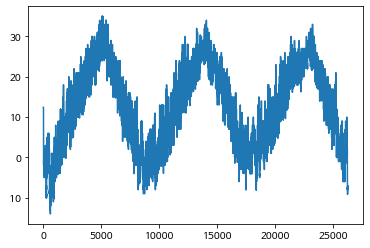

In [124]:
EDA(data_fcst,'3시간기온')
#1/3로 나눠서 넣어줘야함
data_fcst['3시간기온']

count    26280.000000
mean        77.540541
std         17.175894
min          8.441061
25%         65.000000
50%         80.184356
75%         92.623490
max        105.462541
Name: 습도, dtype: float64


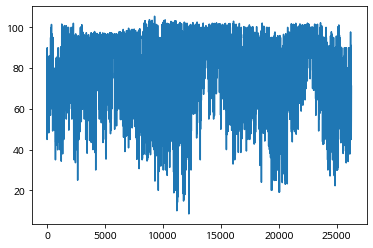

In [125]:
EDA(data_fcst,'습도')
#습도가 105% 존재.. 보간 방법 다시 생각해보거나 수정할 필요가 있음

count    26280.000000
mean       214.802965
std        105.380633
min        -63.050377
25%        122.140673
50%        232.981488
75%        309.953955
max        428.042386
Name: 풍향, dtype: float64


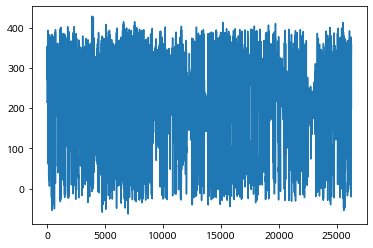

In [126]:
EDA(data_fcst,'풍향')
#풍향 -63~ 428 존재 // 변환다시했으면 좋겠음
# 8방위로 나눠서 풍향과 상관관계가 높은것들에 대해서만 포함시켜서 모델을 구성후
# 예측 모델로 방위를 예측했으면 좋겠음

count    26280.000000
mean         3.658935
std          2.493538
min          0.100000
25%          2.000000
50%          2.800000
75%          4.487753
max         28.700001
Name: 풍속, dtype: float64


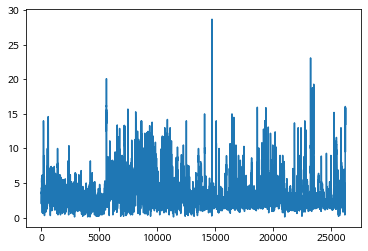

In [128]:
EDA(data_fcst,'풍속')

count    26280.000000
mean         2.488239
std          1.158619
min          1.000000
25%          1.000000
50%          3.000000
75%          3.666667
max          4.000000
Name: 하늘상태, dtype: float64


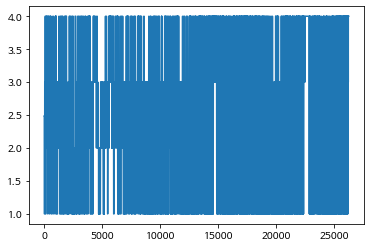

In [129]:
EDA(data_fcst,'하늘상태')
# 평균으로 채워넣어서 이렇게 나온듯
# 얘도 분류 모델을 만들어서 하면 좋지 않을까?

count    26280.000000
mean         0.147865
std          0.432999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: 강수형태, dtype: float64


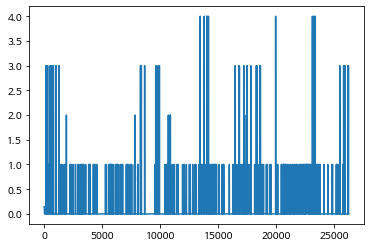

In [130]:
EDA(data_fcst,'강수형태')
#얘도 마찬가지.. 평균 넣어줘서
# 간단하게 할꺼면 평균보다는 최빈값을 넣어주면 좋았을듯//df['강수형태'].value_counts(dropna=True).idxmax()

In [ ]:
#6시간강수량, 6시간 적설에 대해서도 6으로 나눠주던가.. 해야될듯 싶음

count    26280.000000
mean        19.393012
std         20.422367
min          0.000000
25%          0.000000
50%         20.000000
75%         26.666667
max         90.000000
Name: 강수확률, dtype: float64


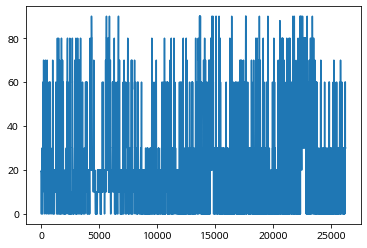

In [131]:
EDA(data_fcst,'강수확률')

## data_obs

In [132]:
data_obs

,time,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),dangjin_floating
0,2018-01-01 00:00:00,0.257634,0.0,0.094017,0.0,0.594499,0.076487,0.312500,0.758095,0.766478,0.0,0.0,0.0,NaN,0.318030,0.114493,0.113475,0.123393,0.104225,NaN,0.0
1,2018-01-01 01:00:00,0.230916,0.0,0.085470,0.0,0.683674,0.076487,0.316532,0.756190,0.764595,0.0,0.0,0.0,NaN,0.318030,0.111594,0.111111,0.120823,0.101408,0.092025,0.0
2,2018-01-01 02:00:00,0.215649,0.0,0.034188,0.0,0.753032,0.079320,0.322581,0.756190,0.766478,0.0,0.0,0.0,NaN,0.318030,0.108696,0.106383,0.118252,0.101408,0.092025,0.0
3,2018-01-01 03:00:00,0.200382,0.0,0.017094,0.0,0.782757,0.076487,0.316532,0.761905,0.772128,0.0,0.0,0.0,NaN,0.318030,0.104348,0.104019,0.115681,0.098592,0.092025,0.0
4,2018-01-01 04:00:00,0.190840,0.0,0.051282,0.0,0.792665,0.073654,0.308468,0.761905,0.772128,0.0,0.0,0.0,NaN,0.318030,0.102899,0.101655,0.115681,0.095775,0.088957,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2020-12-30 19:00:00,0.156489,0.0,0.529915,0.0,0.485508,0.031161,0.167339,0.735238,0.736347,0.0,0.0,0.0,1.0,0.175322,0.071014,0.115839,0.125964,0.112676,0.110429,0.0
26276,2020-12-30 20:00:00,0.156489,0.0,0.675214,0.0,0.465691,0.028329,0.159274,0.737143,0.738230,0.0,0.0,0.0,1.0,0.292978,0.063768,0.113475,0.125964,0.109859,0.107362,0.0
26277,2020-12-30 21:00:00,0.150763,0.0,0.452991,0.0,0.475599,0.028329,0.157258,0.746667,0.747646,0.0,0.0,0.0,1.0,0.277941,0.060870,0.113475,0.123393,0.109859,0.107362,0.0
26278,2020-12-30 22:00:00,0.146947,0.0,0.461538,0.0,0.535049,0.033994,0.177419,0.748571,0.749529,0.0,0.0,0.0,0.9,0.114556,0.057971,0.111111,0.120823,0.107042,0.107362,0.0


In [133]:
data_obs.columns

Index(['time', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)',
       '전운량(10분위)', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'dangjin_floating'],
      dtype='object')

count    26280.000000
mean         0.537439
std          0.197591
min          0.000000
25%          0.374046
50%          0.547710
75%          0.704198
max          1.000000
Name: 기온(°C), dtype: float64


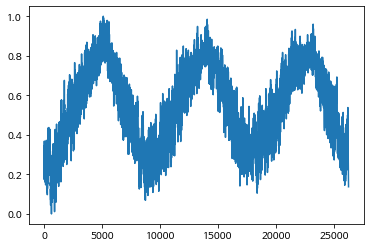

In [135]:
EDA(data_obs,'기온(°C)')

count    26280.000000
mean         0.002394
std          0.019203
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 강수량(mm), dtype: float64


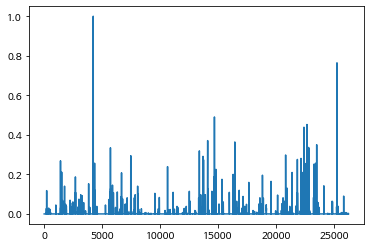

In [136]:
EDA(data_obs,'강수량(mm)')
#아까 말했던것 처럼 특정 값 이상을 빼주던지//10으로 바꾸던지 해야될듯함

count    26280.000000
mean         0.163611
std          0.132357
min          0.000000
25%          0.059829
50%          0.136752
75%          0.247863
max          1.000000
Name: 풍속(m/s), dtype: float64


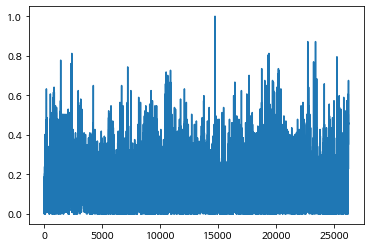

In [137]:
EDA(data_obs,'풍속(m/s)')

In [138]:
data_obs['풍향(16방위)'].value_counts()
#얘는 왜 다 0이냠??ㅋㅋ

0.0    26280
Name: 풍향(16방위), dtype: int64

count    26280.000000
mean         0.620001
std          0.202824
min          0.000000
25%          0.465691
50%          0.644041
75%          0.812482
max          1.000000
Name: 습도(%), dtype: float64


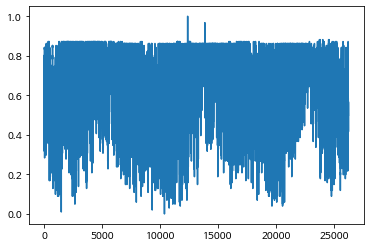

In [139]:
EDA(data_obs,'습도(%)')

count    26280.000000
mean         0.331078
std          0.243837
min          0.000000
25%          0.121813
50%          0.260623
75%          0.512748
max          1.000000
Name: 증기압(hPa), dtype: float64


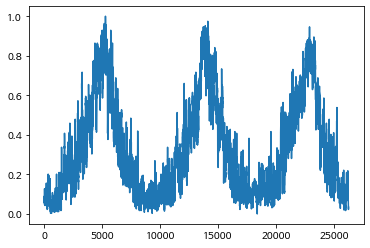

In [140]:
EDA(data_obs,'증기압(hPa)')

count    26280.000000
mean         0.592707
std          0.222925
min          0.000000
25%          0.409274
50%          0.594758
75%          0.788306
max          1.000000
Name: 이슬점온도(°C), dtype: float64


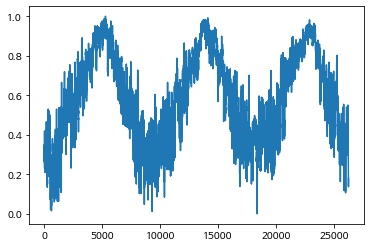

In [142]:
EDA(data_obs,'이슬점온도(°C)')

count    26280.000000
mean         0.572561
std          0.162256
min          0.000000
25%          0.447619
50%          0.573333
75%          0.699048
max          1.000000
Name: 현지기압(hPa), dtype: float64


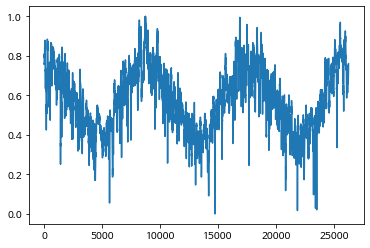

In [143]:
EDA(data_obs,'현지기압(hPa)')

count    26280.000000
mean         0.573173
std          0.162570
min          0.000000
25%          0.448211
50%          0.574388
75%          0.700565
max          1.000000
Name: 해면기압(hPa), dtype: float64


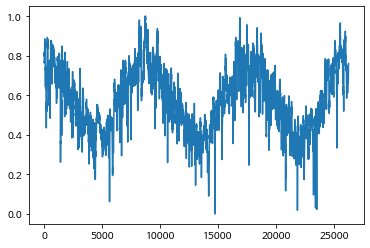

In [144]:
EDA(data_obs,'해면기압(hPa)')

count    26280.000000
mean         0.286579
std          0.422293
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max          1.000000
Name: 일조(hr), dtype: float64


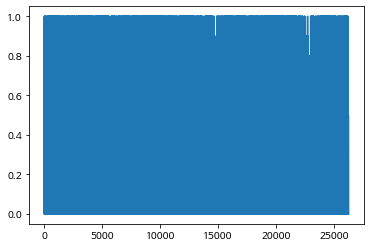

In [145]:
EDA(data_obs,'일조(hr)')

count    26280.000000
mean         0.126365
std          0.190353
min          0.000000
25%          0.000000
50%          0.004124
75%          0.212371
max          1.000000
Name: 일사(MJ/m2), dtype: float64


0.1    0.000000
0.2    0.000000
0.3    0.000000
0.4    0.000000
0.5    0.004124
0.6    0.053608
0.7    0.148454
0.8    0.280412
0.9    0.443505
1.0    1.000000
Name: 일사(MJ/m2), dtype: float64

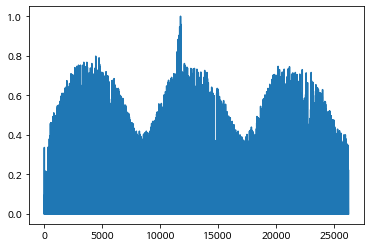

In [153]:
EDA(data_obs,'일사(MJ/m2)')
data_obs['일사(MJ/m2)'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

count    26280.000000
mean         0.004098
std          0.044362
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 적설(cm), dtype: float64


0.1    0.0
0.2    0.0
0.3    0.0
0.4    0.0
0.5    0.0
0.6    0.0
0.7    0.0
0.8    0.0
0.9    0.0
1.0    1.0
Name: 적설(cm), dtype: float64

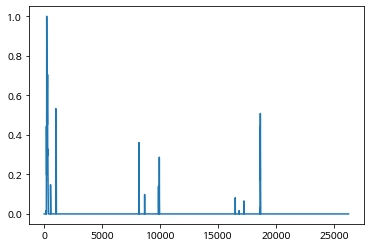

In [156]:
EDA(data_obs,'적설(cm)')
data_obs['적설(cm)'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
#적설또한.. 바꿔줄 필요가 있다고 생각


In [158]:
data_obs['전운량(10분위)'].value_counts()

0.0    4801
1.0    3691
0.9    2265
0.8    1929
0.7    1871
0.6    1587
0.5    1070
0.1    1024
0.2     925
0.4     887
0.3     839
Name: 전운량(10분위), dtype: int64

count    26280.000000
mean         0.318030
std          0.182227
min          0.000000
25%          0.207255
50%          0.297938
75%          0.379321
max          1.000000
Name: 시정(10m), dtype: float64


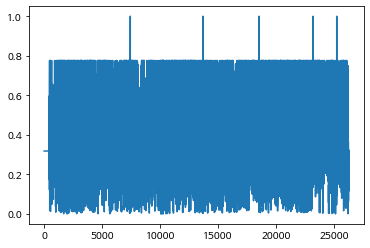

In [161]:
EDA(data_obs,'시정(10m)')

count    26280.000000
mean         0.348440
std          0.169548
min          0.000000
25%          0.197101
50%          0.346377
75%          0.479710
max          1.000000
Name: 지면온도(°C), dtype: float64


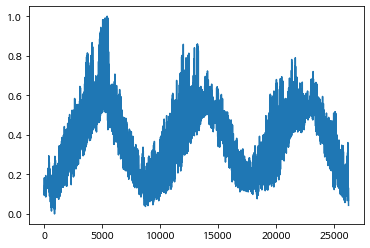

In [162]:
EDA(data_obs,'지면온도(°C)')

count    26280.000000
mean         0.429392
std          0.228761
min          0.000000
25%          0.219267
50%          0.425532
75%          0.635934
max          1.000000
Name: 5cm 지중온도(°C), dtype: float64


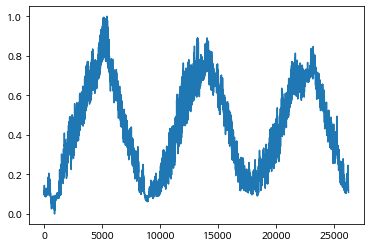

In [163]:
EDA(data_obs,'5cm 지중온도(°C)')